In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset (assuming the file is uploaded to Colab)
from google.colab import files
uploaded = files.upload()

# Load the dataset into a pandas DataFrame
file_name = next(iter(uploaded))
iris_data = pd.read_csv(file_name)

# Display the first few rows of the dataset
iris_data.head()


Saving Iris.csv to Iris.csv


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Drop the 'Id' column
iris_data = iris_data.drop(columns=['Id'])

# Encode the target labels
label_encoder = LabelEncoder()
iris_data['Species'] = label_encoder.fit_transform(iris_data['Species'])

# Define features and target
X = iris_data.drop(columns=['Species'])
y = iris_data['Species']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (120, 4)
Testing set shape: (30, 4)


In [ ]:
# Train the decision tree classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)
confusion_matrix_output = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report_output)
print("\nConfusion Matrix:\n", confusion_matrix_output)


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


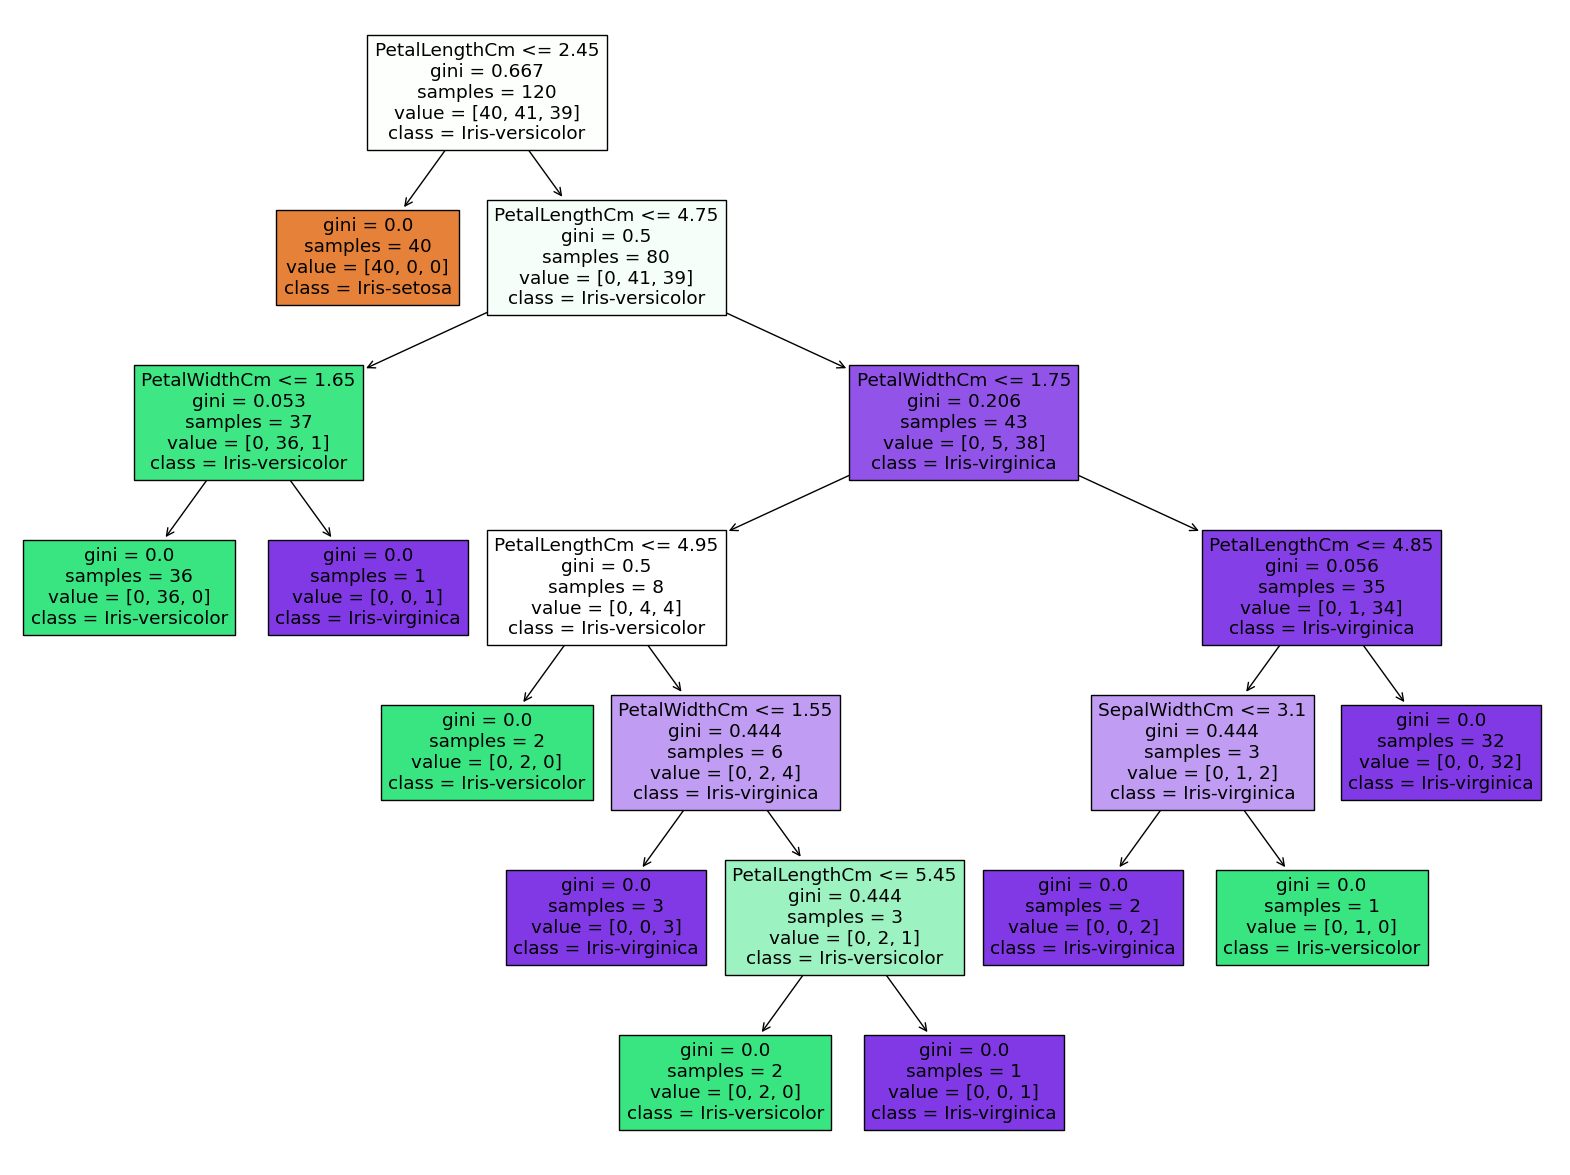

In [ ]:
# Import visualization libraries
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20,15))
plot_tree(classifier, feature_names=X.columns, class_names=label_encoder.classes_, filled=True)
plt.show()
